In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading Data

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data cleaning

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [6]:
Male = pd.get_dummies(df['sex'], drop_first= True)
Male

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [8]:
df = pd.concat([df, Male], axis=1)
df

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [11]:
# same for smoker
Smoker = pd.get_dummies(df['smoker'], drop_first=True).rename(columns={'yes':'Smoker'})
df = pd.concat([df,Smoker], axis=1)
df

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [13]:
# unique regoins in data
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
# same for region
Region = pd.get_dummies(df['region'])
df = pd.concat([df,Region], axis=1)
df

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0,1


## Exploratory Analysis

In [33]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

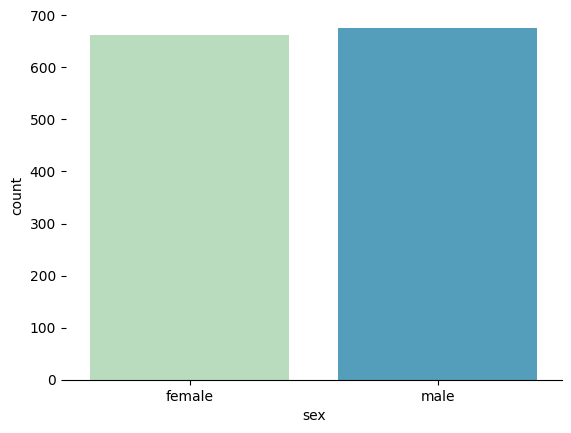

In [34]:
sns.countplot(x='sex', data=df, palette='GnBu')
sns.despine(left=True) # to remove the border

## Relationship of Smoking and gender to Charges

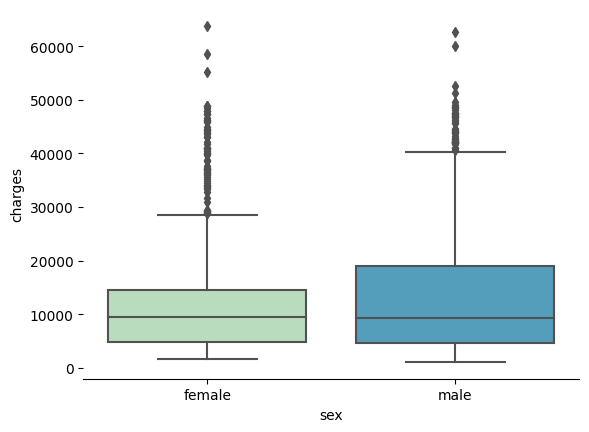

In [37]:
sns.boxplot(x='sex', y='charges', data=df, palette='GnBu')
sns.despine(left=True)
plt.show()

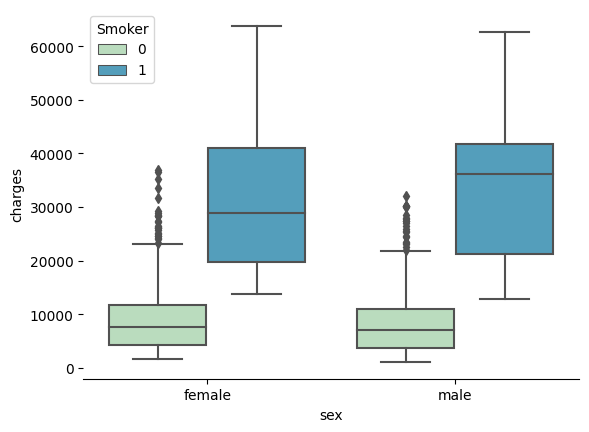

In [38]:
sns.boxplot(x='sex', y='charges', data=df, palette='GnBu', hue='Smoker')
sns.despine(left=True)
plt.show()

### checking the smoker and charges

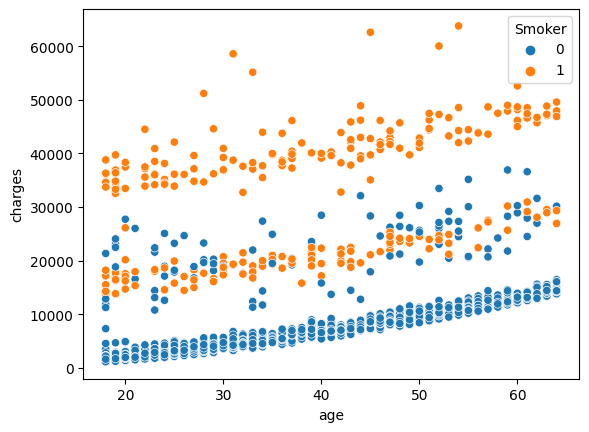

In [41]:
sns.scatterplot(x='age',y='charges', data=df, hue='Smoker')
plt.show()

* So from above graph, we can say that smoking effects the charges where as the region is not at all effecting anything here
* now lets check is there any relation between BMI and charges?

### checking the BMI and Charges for smoker

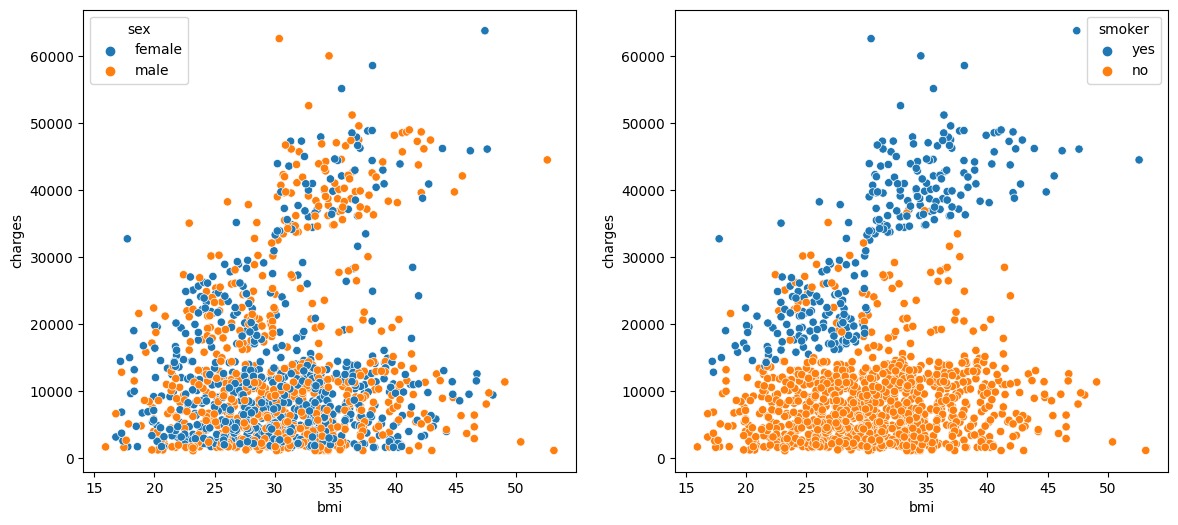

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.scatterplot(x='bmi',y='charges', data=df, hue='sex',ax=ax[0])
sns.scatterplot(x='bmi',y='charges', data=df, hue='smoker', ax=ax[1])
plt.show()

we are done with the insights we want, know lets have the data which we want to make some training model  

In [58]:
data = df.drop(['sex','smoker','region'], axis=1)
data

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


<AxesSubplot:>

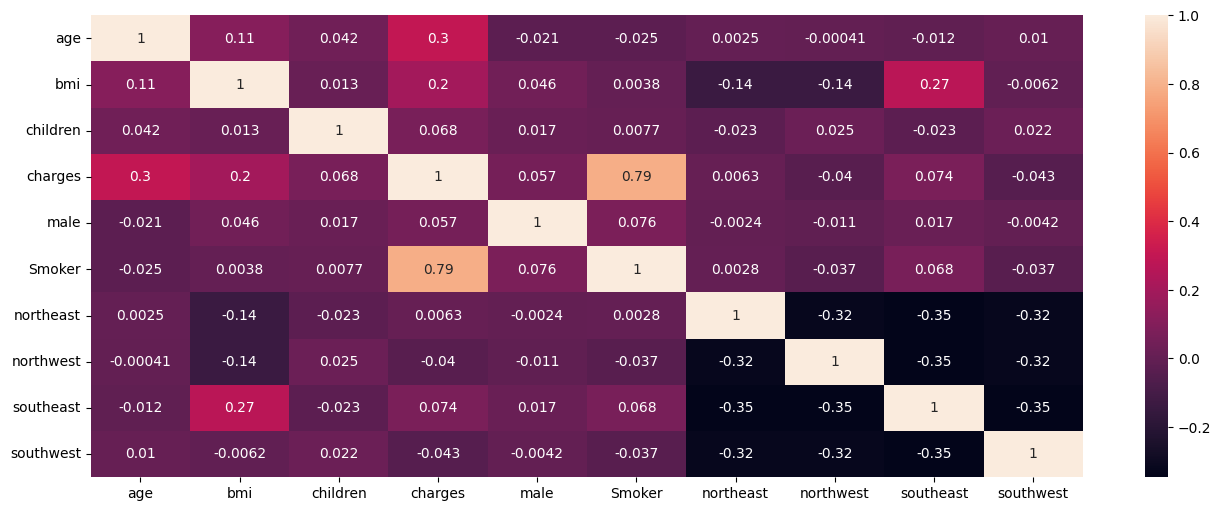

In [59]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

* from above we can say that there is an relation between bmi, charges, age, smoker

## Splitting the data

In [93]:
x = data[['bmi','Smoker','age']]
y = data['charges']

In [94]:
x.head()

,bmi,Smoker,age
0,27.900,1,19
1,33.770,0,18
2,33.000,0,28
3,22.705,0,33
4,28.880,0,32


In [95]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size=0.7)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((936, 3), (402, 3), (936,), (402,))

## scaling the data

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [111]:
scaled_x_test[:10]

array([[-0.63236291,  1.96850197, -1.37197855],
       [-0.88108949, -0.50800051,  0.33201471],
       [ 0.23775854, -0.50800051,  0.54501387],
       [-0.16020399, -0.50800051, -0.16498332],
       [ 0.27654302, -0.50800051,  0.61601359],
       [-1.11463953, -0.50800051,  1.25501106],
       [ 0.17030726, -0.50800051,  0.11901555],
       [-0.06408592, -0.50800051, -0.0939836 ],
       [-0.07588989, -0.50800051, -1.51397799],
       [-0.1871845 , -0.50800051, -0.94598023]])

## Support Vector Regression Model

In [99]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [100]:
predict = regressor.predict(scaled_x_test)

In [106]:
predict[:10]

array([9621.75702224, 9490.69452128, 9531.35992425, 9415.12131999,
       9543.53129468, 9604.40226121, 9461.54714883, 9425.58921136,
       9385.61162054, 9363.35001618])

In [107]:
y_test[:10]

261     17085.26760
967      7518.02535
1076     8551.34700
164      5028.14660
201      8871.15170
661     22192.43711
100      6186.12700
1219     7537.16390
808      1131.50660
871      3392.36520
Name: charges, dtype: float64

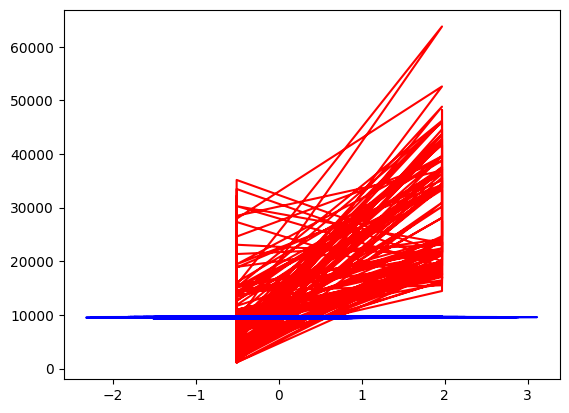

In [112]:
plt.plot(scaled_x_test[:,1], y_test, color='red')
plt.plot(scaled_x_test, predict, color='blue')
plt.show()